In [8]:
import warnings
warnings.filterwarnings("ignore")
import os
import sys

repo_path = '/Users/loureiro/Documents/Courses/CS-401_ADA/ada-2023-project-adacadabra2023'
sys.path.append(repo_path)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pickle as pkl
import seaborn as sns

import src.data.Preprocessing as pproc 
from src.data.Data import load_data

In [2]:
# Load datasets
dpath = os.path.join(repo_path, 'data', 'unified_breweries.pkl')
with open(dpath, 'rb') as f:
    breweries = pkl.load(f)

data_path = os.path.join(repo_path, 'data', 'unified_ratings.pkl')
with open(data_path, 'rb') as f:
    ratings = pkl.load(f)

In [3]:
display(breweries)

,id,location,name,nbr_beers_rb,total_nbr_beers,nbr_beers_ba
0,3198.0,Gabon,Sobraga,3.0,3.0,0.0
1,13538.0,Northern Ireland,Ards Brewing Co.,13.0,13.0,7.0
2,22304.0,Northern Ireland,Barrahooley Craft Brewery,4.0,4.0,3.0
3,22818.0,Northern Ireland,Boundary,66.0,66.0,0.0
4,24297.0,Northern Ireland,Brewbot Belfast,3.0,3.0,0.0
...,...,...,...,...,...,...
27508,34237.0,United States,White Rabbit Brewing Company,0.0,18.0,18.0
27509,34240.0,United States,Farmhouse Brewing Co.,0.0,4.0,4.0
27510,34242.0,Germany,Privatbrauerei Franz Joseph Sailer,0.0,6.0,6.0
27511,34243.0,United States,John Harvard’s Brewery & Ale House,0.0,491.0,491.0


In [4]:
# Unify all states in the US and Canada as one country 
breweries['location'] = breweries['location'].apply(pproc.unify_location)

NameError: name 'unified_breweries' is not defined

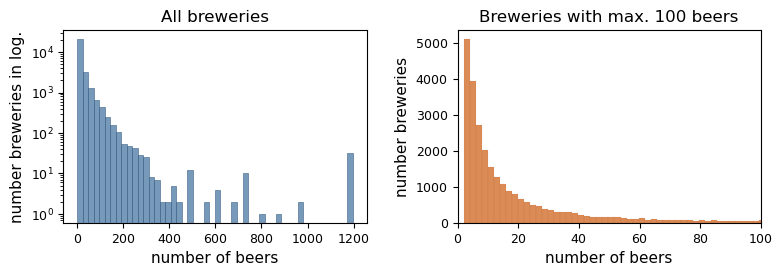

In [5]:
# Histograms showing the complete distribution of the number of beers per brewery on the left and the number of breweries producing up to 100 beers on the right
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9,2.5), sharex=False, sharey=False, gridspec_kw={'width_ratios':[1,1], 'wspace': 0.3})

sns.histplot(data=breweries, x='total_nbr_beers', bins=50, ax=axs[0], color='#4a79a5', edgecolor='#3b6084')
axs[0].set_xlabel('number of beers', fontsize='11')
axs[0].set_ylabel('number breweries in log.', fontsize='11')
axs[0].set_yscale('log')
axs[0].set_title('All breweries', fontsize='12')
for label in (axs[0].get_xticklabels() + axs[0].get_yticklabels()):
    label.set_fontsize(9)

sns.histplot(data=breweries, x='total_nbr_beers', bins=600, ax=axs[1], color='#cf651d', edgecolor='#a01010')
axs[1].set_xlim(0,100)
axs[1].set_xlabel('number of beers', fontsize='11')
axs[1].set_ylabel('number breweries', fontsize='11')
axs[1].set_title('Breweries with max. 100 beers', fontsize='12')
for label in (axs[1].get_xticklabels() + axs[1].get_yticklabels()):
    label.set_fontsize(9)

# fig.suptitle('Distribution of beers produced by brewery', weight='bold', fontsize='13')

plt.show()

In [6]:
# Here we define the threshold for local vs industrial breweries
# Local breweries < 15 beers produced
# Industrial breweries > 15 beers produced
breweries['local_brewery'] = breweries['total_nbr_beers'].apply(lambda x: True if x < 15 else False)
breweries

,id,location,name,nbr_beers_rb,total_nbr_beers,nbr_beers_ba,local_brewery
0,3198.0,Gabon,Sobraga,3.0,3.0,0.0,True
1,13538.0,Northern Ireland,Ards Brewing Co.,13.0,13.0,7.0,True
2,22304.0,Northern Ireland,Barrahooley Craft Brewery,4.0,4.0,3.0,True
3,22818.0,Northern Ireland,Boundary,66.0,66.0,0.0,False
4,24297.0,Northern Ireland,Brewbot Belfast,3.0,3.0,0.0,True
...,...,...,...,...,...,...,...
27508,34237.0,United States,White Rabbit Brewing Company,0.0,18.0,18.0,False
27509,34240.0,United States,Farmhouse Brewing Co.,0.0,4.0,4.0,True
27510,34242.0,Germany,Privatbrauerei Franz Joseph Sailer,0.0,6.0,6.0,True
27511,34243.0,United States,John Harvard’s Brewery & Ale House,0.0,491.0,491.0,False


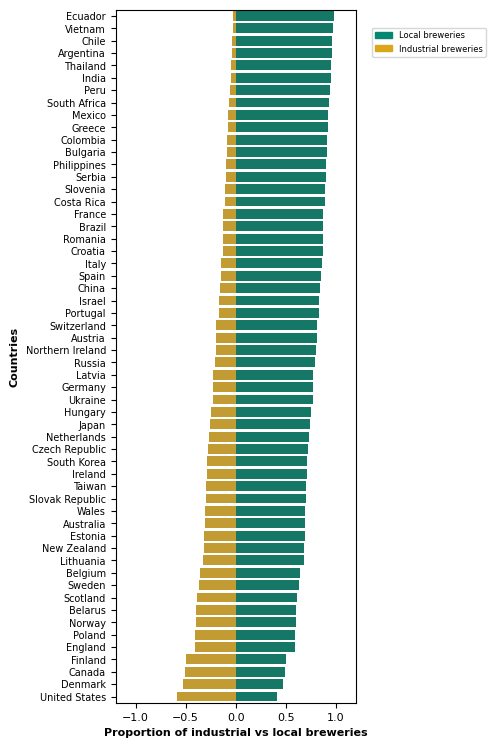

In [12]:
# Plotting the proportion of local vs industrial breweries per country
# We filtered out countries having less than 30 breweries for better statistics
fig, ax = plt.subplots(figsize=(3.1, 9))

grouped = breweries.groupby('location').agg({
    'local_brewery': lambda x: x.mean(),
    'name': 'size'
}).reset_index()
grouped.sort_values(by='local_brewery', ascending=False, inplace=True)
grouped['industrial_brewery'] = grouped['local_brewery'] - 1
grouped = grouped[grouped['name'] > 30]

plt.rcParams['font.size'] = '9'
for label in (ax.get_yticklabels()):
    label.set_fontsize(7)

sns.barplot(data=grouped, y='location', x='local_brewery', color='#058872')
sns.barplot(data=grouped, y='location', x='industrial_brewery', color='#DAA71A')

local_patch = mpatches.Patch(color='#058872', label='Local breweries')
industrial_patch = mpatches.Patch(color='#DAA71A', label='Industrial breweries')
plt.legend(handles=[local_patch, industrial_patch], bbox_to_anchor=(1.05, 0.98), fontsize='6', ncol=1)
plt.ylabel('Countries', weight='bold')
plt.xlabel('Proportion of industrial vs local breweries', weight='bold')
# plt.legend(labels=["Local breweries","Industrial breweries"], loc='upper left', labelcolor=['#058872', '#DAA71A'], fontsize='small')
plt.xlim(-1.2,1.2)
plt.show()

In [22]:
# Filtered out countries having less than 30 breweries for better statistics
country_to_keep = grouped[grouped['name'] > 30]['location']

df_breweries = breweries[breweries['location'].isin(country_to_keep)]
df_breweries

,id,location,name,nbr_beers_rb,total_nbr_beers,nbr_beers_ba,local_brewery
1,13538.0,Northern Ireland,Ards Brewing Co.,13.0,13.0,7.0,True
2,22304.0,Northern Ireland,Barrahooley Craft Brewery,4.0,4.0,3.0,True
3,22818.0,Northern Ireland,Boundary,66.0,66.0,0.0,False
4,24297.0,Northern Ireland,Brewbot Belfast,3.0,3.0,0.0,True
5,27006.0,Northern Ireland,Bullhouse Brewing Company,6.0,6.0,6.0,True
...,...,...,...,...,...,...,...
27508,34237.0,United States,White Rabbit Brewing Company,0.0,18.0,18.0,False
27509,34240.0,United States,Farmhouse Brewing Co.,0.0,4.0,4.0,True
27510,34242.0,Germany,Privatbrauerei Franz Joseph Sailer,0.0,6.0,6.0,True
27511,34243.0,United States,John Harvard’s Brewery & Ale House,0.0,491.0,491.0,False


In [27]:
# Filter ratings dataset
df_ratings = ratings[ratings['country_brewery'].isin(country_to_keep)]
df_ratings = df_ratings[['user_id','Procedence','brewery_id']]
# Join breweries dataset to rd
#rd.join(breweries, on=['Procedence','brewery_id'],)
df_ratings

,user_id,Procedence,brewery_id
0,6824.0,BA,1.0
1,4053.0,BA,1.0
2,3257.0,BA,1.0
3,3299.0,BA,1.0
4,20143.0,BA,1.0
...,...,...,...
13509441,140470.0,RB,21442.0
13509442,128401.0,RB,21442.0
13509443,81835.0,RB,21442.0
13509444,81782.0,RB,21442.0


In [23]:
df_breweries['location'].nunique()

56

In [21]:
df_ratings['brewery_id'].nunique()

11909

In [29]:
df_breweries['id'].nunique()

26583